In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pprint
import numpy as np
import glob
from scipy.stats import linregress
import statsmodels.api as sm

In [2]:
filepath = "C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core"
all_files = glob.glob(filepath + "/*.csv")
all_files

['C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\AllstarFull.csv',
 'C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\Appearances.csv',
 'C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\AwardsManagers.csv',
 'C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\AwardsPlayers.csv',
 'C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\AwardsShareManagers.csv',
 'C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core\\AwardsSharePlayers.csv',
 'C:/Users/mal

In [3]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df2 = frame[(frame['yearID'] >= 2000) & (frame['yearID'] <= 2016) ]

In [5]:
# Read in Salaries 

filepath = "C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core/Salaries.csv"

salaries_df = pd.read_csv(filepath)

salaries_df



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [6]:
# Filter by years 2000 to 2016

salaries = salaries_df[(salaries_df['yearID'] >= 2000) & (salaries_df['yearID'] <= 2016) ]

salaries

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [7]:
# Read in Teams

filepath2 = "C:/Users/malad/OneDrive/Desktop/SMU Real/smu_project1_baseball/baseballdatabank-master/baseballdatabank-master/baseballdatabank-master/core/Teams.csv"

teams_df = pd.read_csv(filepath2)

teams_df. columns



Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [8]:
# Filter by years 2000 to 2016

teams_df2 = teams_df[(teams_df['yearID'] >= 2000) & (teams_df['yearID'] <= 2016) ]

teams_df2

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2325,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,182,0.978,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,...,138,0.982,Arizona Diamondbacks,Bank One Ballpark,2942251.0,105,103,ARI,ARI,ARI
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,...,138,0.979,Atlanta Braves,Turner Field,3234304.0,101,99,ATL,ATL,ATL
2328,2000,AL,BAL,BAL,E,4,162,81.0,74,88,...,151,0.981,Baltimore Orioles,Oriole Park at Camden Yards,3297031.0,95,96,BAL,BAL,BAL
2329,2000,AL,BOS,BOS,E,2,162,81.0,85,77,...,120,0.982,Boston Red Sox,Fenway Park II,2585895.0,104,103,BOS,BOS,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,2016,NL,SLN,STL,C,2,162,81.0,86,76,...,169,0.983,St. Louis Cardinals,Busch Stadium III,3444490.0,100,99,STL,SLN,SLN
2831,2016,AL,TBA,TBD,E,5,162,81.0,68,94,...,129,0.984,Tampa Bay Rays,Tropicana Field,1286163.0,93,94,TBR,TBA,TBA
2832,2016,AL,TEX,TEX,W,1,162,81.0,95,67,...,190,0.984,Texas Rangers,Rangers Ballpark in Arlington,2710402.0,106,105,TEX,TEX,TEX
2833,2016,AL,TOR,TOR,E,2,162,81.0,89,73,...,144,0.986,Toronto Blue Jays,Rogers Centre,3392099.0,111,110,TOR,TOR,TOR


In [9]:
# Remove columns that were not needed 

teams = teams_df2[['yearID', 'teamID', 'lgID', 'franchID', 'divID', 'G', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B','3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'BPF', 'PPF']]

In [10]:
teams

,yearID,teamID,lgID,franchID,divID,G,W,L,DivWin,WCWin,...,IPouts,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF
2325,2000,ANA,AL,ANA,W,162,82,80,N,N,...,4344,1534,228,662,846,134,182,0.978,102,103
2326,2000,ARI,NL,ARI,W,162,85,77,N,N,...,4331,1441,190,500,1220,107,138,0.982,105,103
2327,2000,ATL,NL,ATL,E,162,95,67,Y,N,...,4321,1428,165,484,1093,129,138,0.979,101,99
2328,2000,BAL,AL,BAL,E,162,74,88,N,N,...,4300,1547,202,665,1017,116,151,0.981,95,96
2329,2000,BOS,AL,BOS,E,162,85,77,N,N,...,4358,1433,173,498,1121,109,120,0.982,104,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,2016,SLN,NL,STL,C,162,86,76,N,N,...,4345,1432,159,475,1290,107,169,0.983,100,99
2831,2016,TBA,AL,TBD,E,162,68,94,N,N,...,4279,1395,210,491,1357,94,129,0.984,93,94
2832,2016,TEX,AL,TEX,W,162,95,67,Y,N,...,4329,1441,201,534,1154,97,190,0.984,106,105
2833,2016,TOR,AL,TOR,E,162,89,73,N,Y,...,4378,1340,183,461,1314,88,144,0.986,111,110


In [11]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 2325 to 2834
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearID    510 non-null    int64  
 1   teamID    510 non-null    object 
 2   lgID      510 non-null    object 
 3   franchID  510 non-null    object 
 4   divID     510 non-null    object 
 5   G         510 non-null    int64  
 6   W         510 non-null    int64  
 7   L         510 non-null    int64  
 8   DivWin    510 non-null    object 
 9   WCWin     510 non-null    object 
 10  LgWin     510 non-null    object 
 11  WSWin     510 non-null    object 
 12  R         510 non-null    int64  
 13  AB        510 non-null    int64  
 14  H         510 non-null    int64  
 15  2B        510 non-null    int64  
 16  3B        510 non-null    int64  
 17  HR        510 non-null    int64  
 18  BB        510 non-null    float64
 19  SO        510 non-null    float64
 20  SB        510 non-null    fl

In [12]:
# Merge team and salaries

data = teams.merge(salaries, on = ['teamID', 'yearID', 'teamID', 'lgID'], how = 'inner')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14165 entries, 0 to 14164
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearID    14165 non-null  int64  
 1   teamID    14165 non-null  object 
 2   lgID      14165 non-null  object 
 3   franchID  14165 non-null  object 
 4   divID     14165 non-null  object 
 5   G         14165 non-null  int64  
 6   W         14165 non-null  int64  
 7   L         14165 non-null  int64  
 8   DivWin    14165 non-null  object 
 9   WCWin     14165 non-null  object 
 10  LgWin     14165 non-null  object 
 11  WSWin     14165 non-null  object 
 12  R         14165 non-null  int64  
 13  AB        14165 non-null  int64  
 14  H         14165 non-null  int64  
 15  2B        14165 non-null  int64  
 16  3B        14165 non-null  int64  
 17  HR        14165 non-null  int64  
 18  BB        14165 non-null  float64
 19  SO        14165 non-null  float64
 20  SB        14165 non-null  fl

In [14]:
data.columns

Index(['yearID', 'teamID', 'lgID', 'franchID', 'divID', 'G', 'W', 'L',
       'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR',
       'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO',
       'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'BPF',
       'PPF', 'playerID', 'salary'],
      dtype='object')

In [15]:
salaries = data.groupby(["yearID", "franchID", "W"]).salary.sum().reset_index()
salaries

,yearID,franchID,W,salary
0,2000,ANA,82,51464167
1,2000,ARI,85,81027833
2,2000,ATL,95,84537836
3,2000,BAL,74,81447435
4,2000,BOS,85,77940333
...,...,...,...,...
505,2016,STL,86,143053500
506,2016,TBD,68,57097310
507,2016,TEX,95,176038723
508,2016,TOR,89,138701700


In [16]:
import seaborn as sns

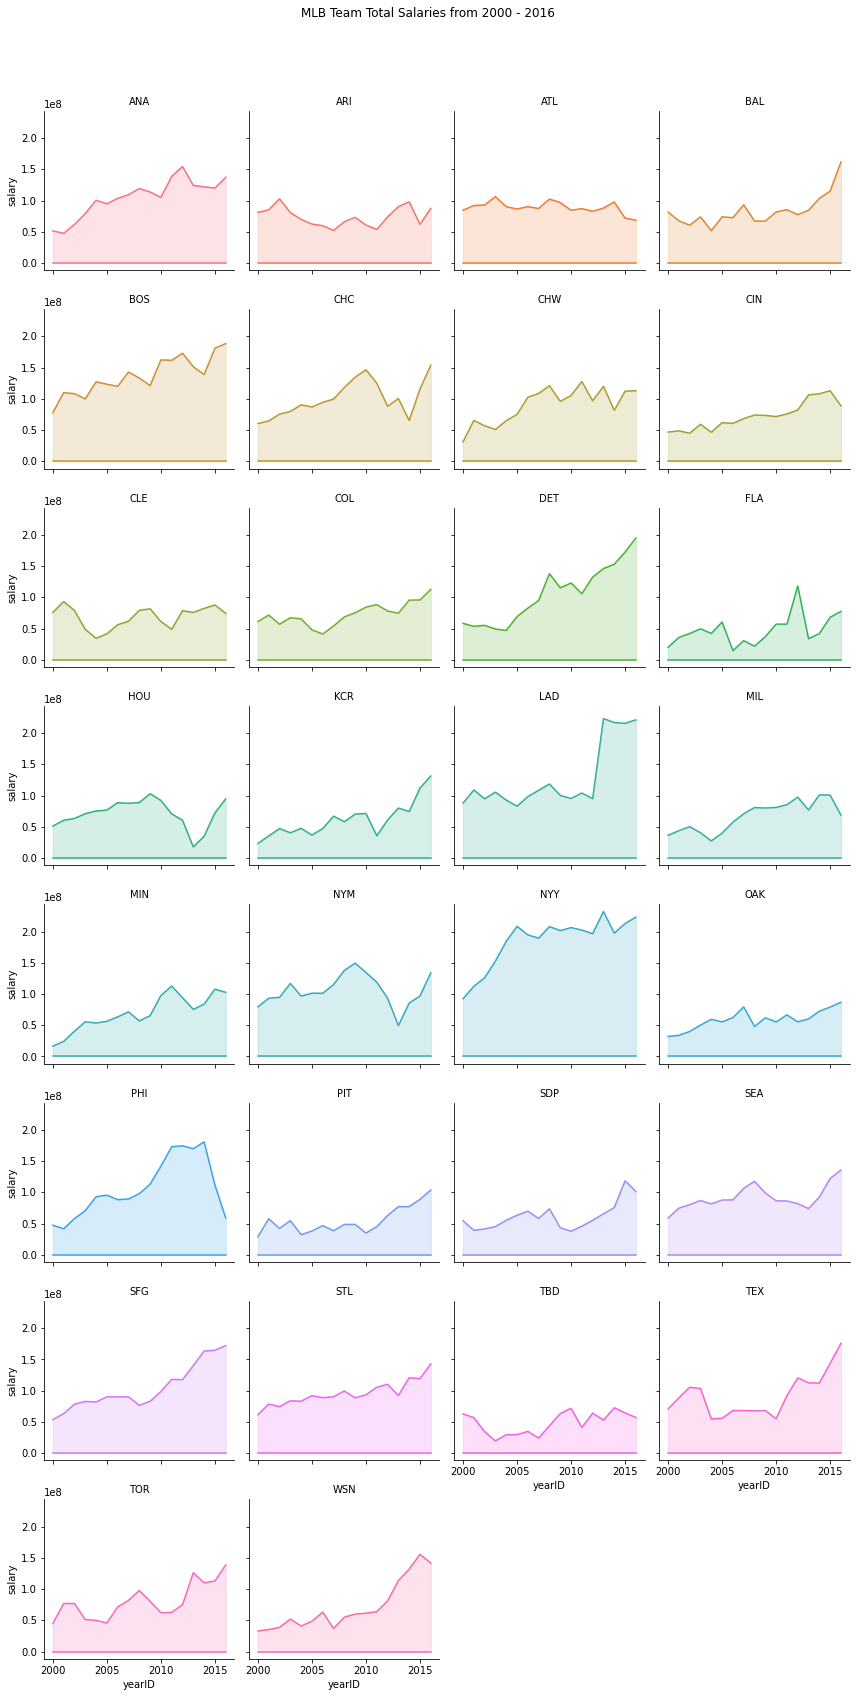

In [64]:
# Create a grid : initialize it
g = sns.FacetGrid(salaries, col='franchID', hue='franchID', col_wrap=4, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'yearID', 'salary')
g = g.map(plt.plot, 'yearID', 'W') 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'yearID', 'salary', alpha=0.2).set_titles("{col_name} franchID")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('MLB Team Total Salaries from 2000 - 2016')

# Show the graph
plt.savefig("multiplotSalaries.png")
plt.show()

<AxesSubplot:xlabel='franchID', ylabel='W'>

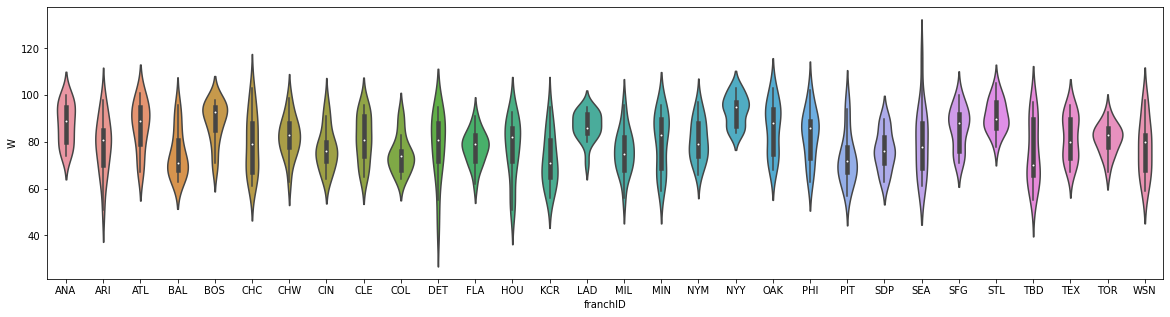

In [18]:
plt.figure(figsize=(20,5))
sns.violinplot(x=salaries["franchID"], y=salaries["W"])

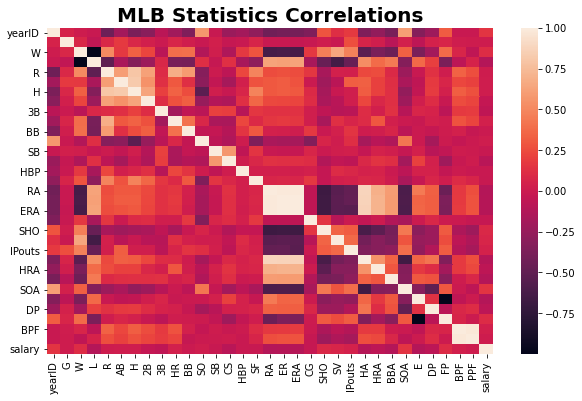

In [49]:
plt.figure(figsize=(10,6))

corrs = data2.corr()

sns.heatmap(corrs)
plt.title("MLB Statistics Correlations", fontweight="bold", fontsize=20)
plt.savefig("corrs_heatmap.png")
plt.show()

In [22]:
#Filtering data down to usable data for regression
data2 = data[(data["yearID"].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]))]
data3= data2.groupby(["yearID", "franchID", "W", "R", "FP", "RA", "HRA", ]).salary.sum().reset_index()
data3

,yearID,franchID,W,R,FP,RA,HRA,salary
0,2000,ANA,82,864,0.978,869,228,51464167
1,2000,ARI,85,792,0.982,754,190,81027833
2,2000,ATL,95,810,0.979,714,165,84537836
3,2000,BAL,74,794,0.981,913,202,81447435
4,2000,BOS,85,792,0.982,745,173,77940333
...,...,...,...,...,...,...,...,...
505,2016,STL,86,779,0.983,712,159,143053500
506,2016,TBD,68,672,0.984,713,210,57097310
507,2016,TEX,95,765,0.984,757,201,176038723
508,2016,TOR,89,759,0.986,666,183,138701700


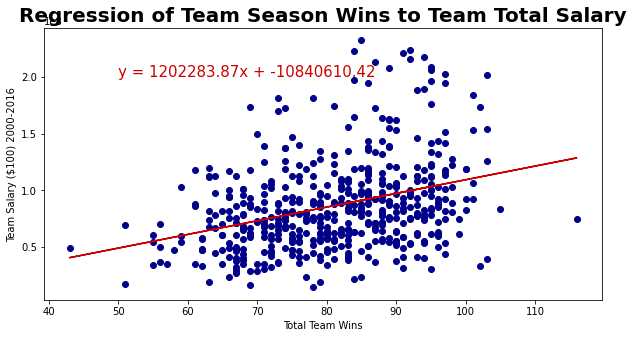

In [57]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,5))
x_values = data3["W"]
y_values = data3['salary']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#000089")
plt.plot(x_values,regress_values,"r-", color="#CD0001")
plt.annotate(line_eq,(50,200000000),fontsize=15,color="#CD0001")
plt.title("Regression of Team Season Wins to Team Total Salary", fontweight="bold", fontsize=20)
plt.xlabel('Total Team Wins')
plt.ylabel('Team Salary ($100) 2000-2016')
plt.savefig("mlb_regression.png")
plt.show()

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [25]:
linregress(x_values, y_values)

LinregressResult(slope=1202283.8702459193, intercept=-10840610.423910797, rvalue=0.34226609881896997, pvalue=1.8365424443165522e-15, stderr=146438.64579316587, intercept_stderr=11972374.539167989)

In [26]:
preds = x_values * slope + intercept

preds

0      8.774667e+07
1      9.135352e+07
2      1.033764e+08
3      7.812840e+07
4      9.135352e+07
           ...     
505    9.255580e+07
506    7.091469e+07
507    1.033764e+08
508    9.616265e+07
509    1.033764e+08
Name: W, Length: 510, dtype: float64

In [27]:
#Regression Analysis
X = data3["W"]
X = sm.add_constant(X) # adding a constant

y = data3["salary"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     67.41
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.84e-15
Time:                        18:22:46   Log-Likelihood:                -9617.6
No. Observations:                 510   AIC:                         1.924e+04
Df Residuals:                     508   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.084e+07    1.2e+07     -0.905      0.3

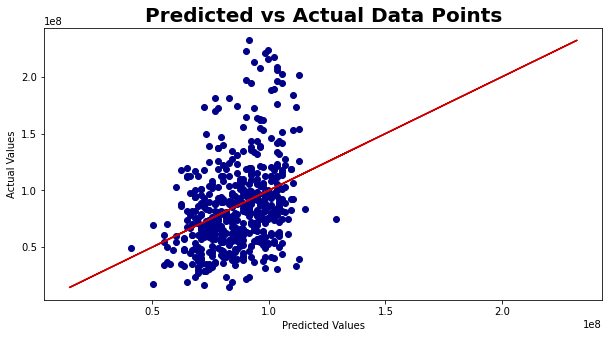

In [60]:
#Predicted vs Actual plot
plt.figure(figsize=(10,5))
plt.scatter(preds, y, color="#000089")
plt.title("Predicted vs Actual Data Points",  fontweight="bold", fontsize=20)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.plot(y, y, color="#CD0001")
plt.savefig("predActual.png")
plt.show()

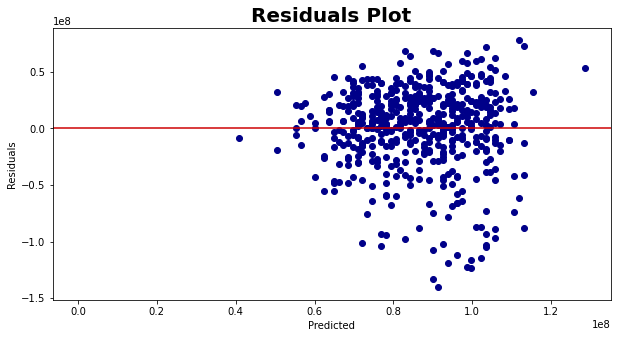

In [79]:
#Residuals Plot
actual = data3["salary"]
residuals = preds - actual

plt.figure(figsize=(10,5))

plt.scatter(preds, residuals, color="#000089")
plt.hlines(0, 0.4, 1.2)
plt.axhline(y=0.1, color='#CD0001', linestyle='-')
plt.title("Residuals Plot",   fontweight="bold", fontsize=20)
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.savefig("residualsplot.png")
plt.show()

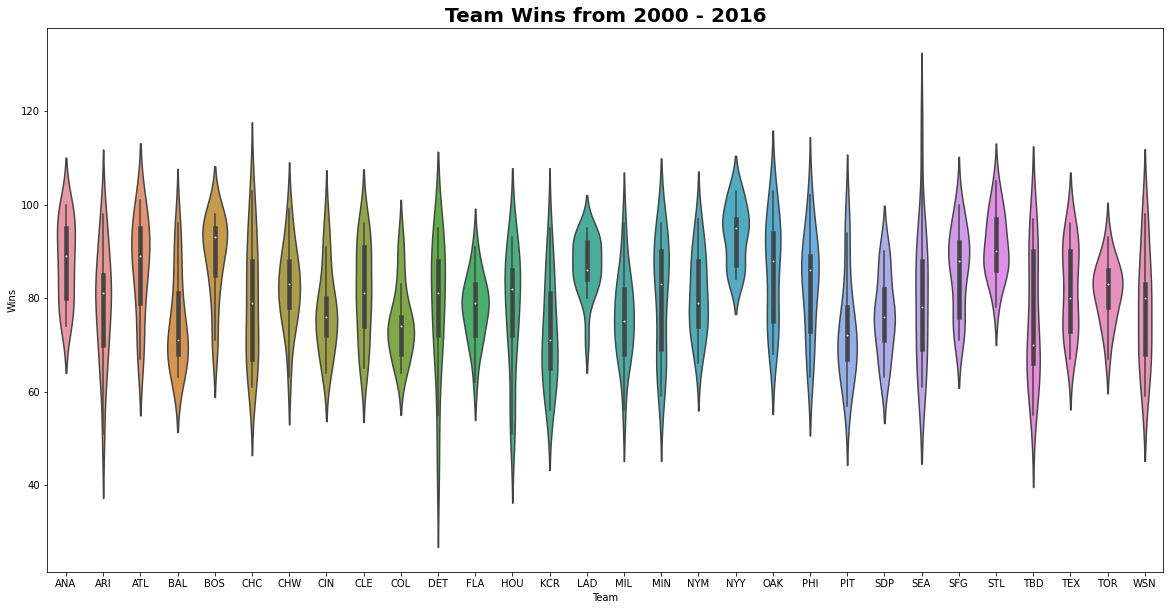

In [62]:
# Create a violinplot to compare means
plt.figure(figsize=(20,10))
sns.violinplot(data=data3, x="franchID", y="W")
plt.title("Team Wins from 2000 - 2016",  fontweight="bold", fontsize=20)
plt.xlabel("Team")
plt.ylabel("Wins")
plt.savefig("teamWinsViolin.png")
plt.show()

In [44]:
data4 = data3.groupby("franchID").agg({"W": ["mean", "std", "var", "count"]}, axis=1)
data4

W                             
               mean        std         var count
franchID                                        
ANA       87.647059   8.824265   77.867647    17
ARI       78.705882  12.123143  146.970588    17
ATL       86.823529  10.666743  113.779412    17
BAL       75.117647  10.246233  104.985294    17
BOS       88.647059   8.971769   80.492647    17
CHC       79.588235  12.869823  165.632353    17
CHW       82.294118   8.823015   77.845588    17
CIN       77.411765   9.110837   83.007353    17
CLE       81.470588  10.155772  103.139706    17
COL       74.823529   7.931230   62.904412    17
DET       78.588235  14.348601  205.882353    17
FLA       77.705882   7.148118   51.095588    17
HOU       77.058824  13.016675  169.433824    17
KCR       72.529412  11.264533  126.889706    17
LAD       87.000000   6.184658   38.250000    17
MIL       76.117647   9.577854   91.735294    17
MIN       80.235294  12.224614  149.441176    17
NYM       80.882353   8.887367   78.985294    17
NYY       93.647059   6.537786   42.742647    17
OAK       85.882353  11.290939  127.485294    17
PHI       82.941176  10.928578  119.433824    17
PIT       73.352941  11.191186  125.242647    17
SDP       76.529412   8.581358   73.639706    17
SEA       80.000000  14.482748  209.750000    17
SFG       86.000000   8.993053   80.875000    17
STL       91.176471   7.090798   50.279412    17
TBD       75.764706  13.599308  184.941176    17
TEX       82.117647   9.551717   91.235294    17
TOR       81.352941   6.499434   42.242647    17
WSN       77.529412  12.196914  148.764706    17

In [45]:
# Extract individual groups
RedSox = data3[data3["franchID"] == "BOS"]["W"]
Detroit = data3[data3["franchID"] == "DET"]["W"]
Minnesota = data3[data3["franchID"] == "MIN"]["W"]
Yankees = data3[data3["franchID"] == "NYY"]["W"]
Texas = data3[data3["franchID"] == "TEX"]["W"]

In [46]:
# Perform the ANOVA
stats.f_oneway(RedSox, Detroit, Minnesota, Yankees, Texas)

F_onewayResult(statistic=5.951065916481702, pvalue=0.0003036897686979882)

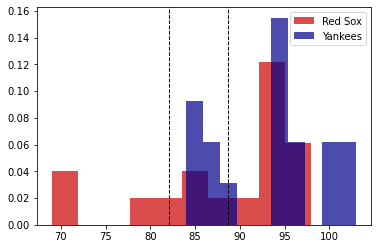

In [81]:
boston = data3.loc[data3.franchID == "BOS"]
yank = data3.loc[data3.franchID == "NYY"]

plt.hist(boston.W, 10, density=True, alpha=0.7, label="Red Sox", color="#CD0001")
plt.hist(yank.W, 10, density=True, alpha=0.7, label="Yankees", color="#000089")
plt.axvline(boston.W.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(texas.W.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()

In [34]:
import scipy.stats as stats

In [37]:
boston.W.mean()

88.6470588235294

In [38]:
texas.W.mean()

82.11764705882354

In [82]:
# Calculate Independent (Two Sample) t-test

test = stats.ttest_ind(boston.W, yank.W, equal_var=False)
print(test)

Ttest_indResult(statistic=-1.8570641752064794, pvalue=0.0733964254784942)
